# Description of the project

You work in the online store "Streamchik", which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.
Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter if you forecast sales for 2017 based on 2016 data or 2027 based on 2026 data.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. ESRB evaluates game content and assigns it an appropriate age category, for example, "For adults", "For younger children" or "For teenagers".

## General information

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import plotly.express as px


In [2]:
# Read
df = pd.read_csv('games.csv', sep=',', index_col=0)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [4]:
# Info
df_initial = len(df)

### Summary

The dataset consists of 11 columns with different data types, as well as 16,715 observations on game sales in different regions. It can be seen that data preprocessing is necessary, since the columns have different lengths. In particular, many values in the user_score, crutic_score and rating columns are not filled in. In order to make it convenient to analyze the data, it is necessary to lower-case the column names, as well as bring the columns to the desired types.

In [5]:
# Lowercase
df.columns = df.columns.str.lower()

## Обработка пропусков и преобразование столбцов к нужным типам

In [6]:
# Delete columns
df.dropna(subset=['name', 'year_of_release'], inplace=True)

In [7]:
# Check null rows
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [8]:
# Change type
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].fillna('-99')
df['user_score'] = df['user_score'].fillna('-99')
df = df.replace('tbd', '-99')
df['critic_score'] = pd.to_numeric(df['critic_score'])
df['user_score'] = pd.to_numeric(df['user_score'])
df['rating'] = df['rating'].fillna('RP')

### Summary

As a result of processing, it turned out that more than 6,000 missing values were found in the user_score, critic_score and rating columns. The empty values in user_score and critic_score were filled with a special "-99" marker to bring the columns to a numeric appearance. The "tbd" marker was also replaced with "-99", as tbd means that there are too few ratings to determine the average rating. Let's convert the year_of_release column to the "int" data type, since we need it for data analysis. In the rating column, replace the empty values with RP (Rating Pending) in accordance with the international classification.

In [9]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [10]:
# First 5 rows
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99.0,-99.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99.0,-99.0,RP,31.38


In [11]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [12]:
df_processed = len(df)
print('The percentage of cleared values out of the total:', (100 - (df_processed / df_initial) * 100))
print('The number of cleared values:', df_initial - df_processed)

The percentage of cleared values out of the total: 1.6212982351181608
The number of cleared values: 271


### Summary

As a result of processing the missing values, 271 observations were deleted, which is 1.6% of the total number of values. In my opinion, this indicator is acceptable and the processing was carried out successfully.

In [13]:
# Analysis of games by year
name_year_of_release = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
name_year_of_release.columns = ['number_of_games']
name_year_of_release.sort_values(by = 'number_of_games', ascending=False).head(10)

,number_of_games
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


AxesSubplot(0.125,0.125;0.775x0.755)


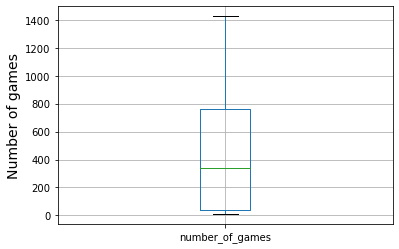

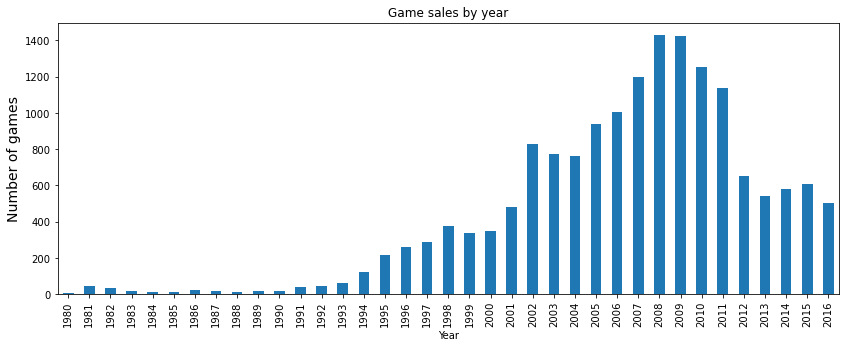

In [14]:
print(name_year_of_release.boxplot())
plt.ylabel('Number of games', fontsize=14)
plt.show()
name_year_of_release.describe()
dict_for_auto = {
    'number_of_games' : [20, (0,1450)],
}

for column in dict_for_auto.keys():
    quantiles = name_year_of_release[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    name_year_of_release[column].plot(kind='bar', figsize=(14,5))
    plt.ylabel('Number of games', fontsize=14)
    plt.title('Game sales by year')
    plt.xlabel('Year')
    plt.show()

In [15]:
fig = px.histogram(df,
                   x='year_of_release',
                   y='all_sales',
                   color='platform',
                   title='Sales histogram for platforms',
                   histfunc='sum'
                   )
fig.show()

### Summary

As a result of analyzing the release of games by year, there is a tendency to increase the number of sales, starting from 1994 to 2010 with a peak in 2008 and 2009, after which there is a tendency to decrease the indicator by the current year 2016. This may be due to the international financial crisis, when the purchasing power of the global population decreased. According to the graph, we can observe that in 2008 and 2009, the Wii, DS, X360, and PS3 were the leaders in terms of the share of games on the market. This is due to the fact that these platforms have just entered the market, so due to the fact that these are big brands, fans are waiting for the release of new games on new platforms.

In [16]:
sales_platform = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending=False)
sales_platform.head(10)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


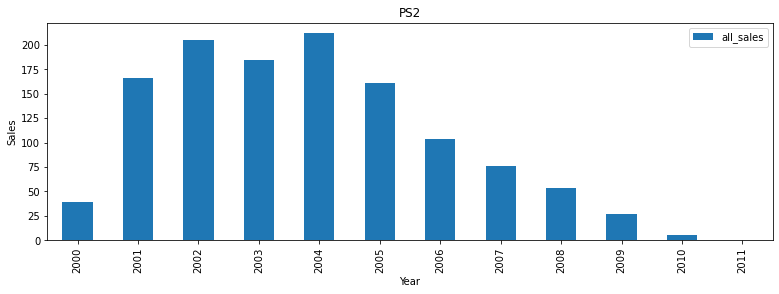

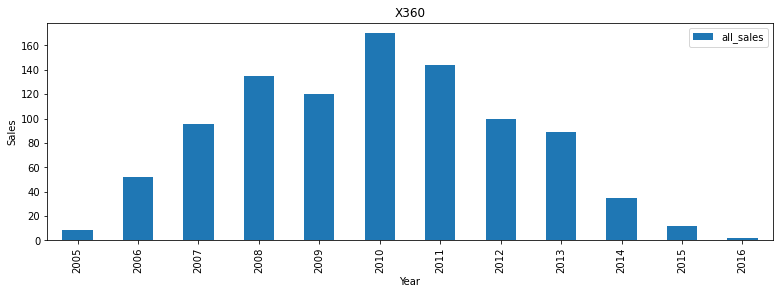

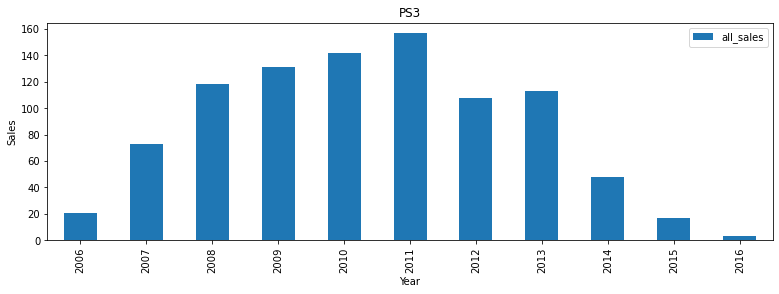

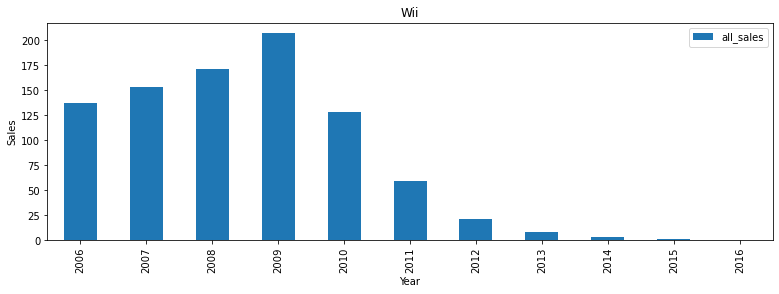

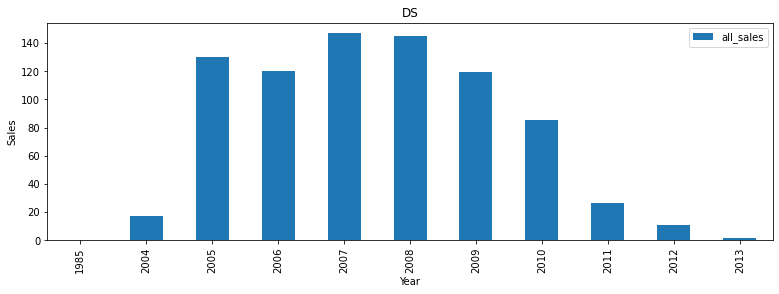

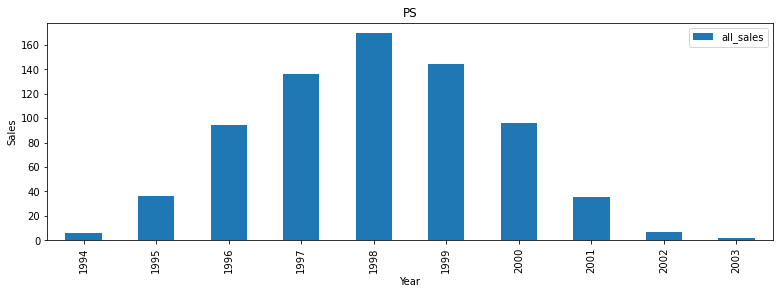

In [17]:
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(kind='bar', figsize=(13, 4))
    plt.title(platform)
    plt.xlabel('Year')
    plt.ylabel('Sales')

### Summary

The platforms 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS' are the leaders among global sales for all time of observations. In general, games on these platforms, with the exception of PS, were released at about the same time in parallel with each other. At the same time, on average, these platforms "live" for an average of 8-9 years, as evidenced by the distribution charts of the 5 most popular platforms with a corresponding peak for 5 years.

In [18]:
df_query = df.query('year_of_release >= 2012')

### Summary

I chose the current period from 2012 for several reasons: 
1) Since according to the schedule of distribution of global sales across platforms, there has been a sharp decline since 2011, after which sales were approximately at the same level from 2012 to 2016. 
2) Since the lifetime of the platforms is approximately 8 years, according to this 4-year period, some platforms will peak in 2017.

In [19]:
platform_all_sales = df_query.pivot_table(index='platform', values='all_sales', aggfunc='sum')
platform_all_sales.columns = ['sales_by_platform']
platform_all_sales.sort_values(by = 'sales_by_platform', ascending=False).head(10)

,sales_by_platform
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


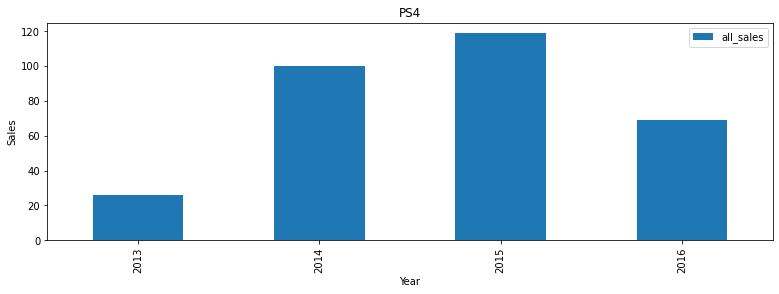

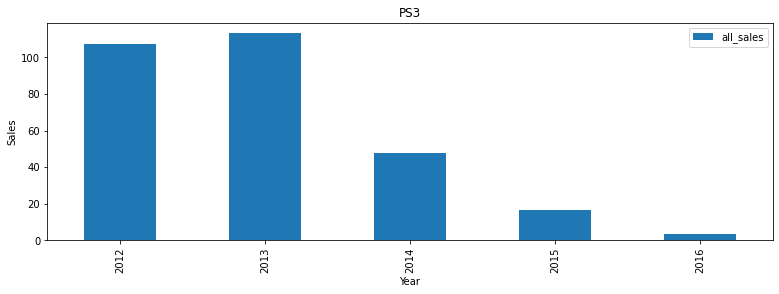

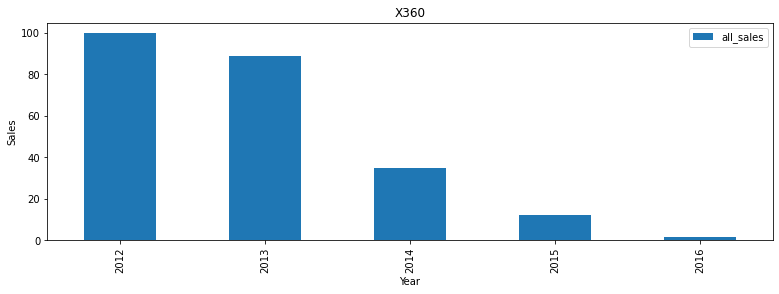

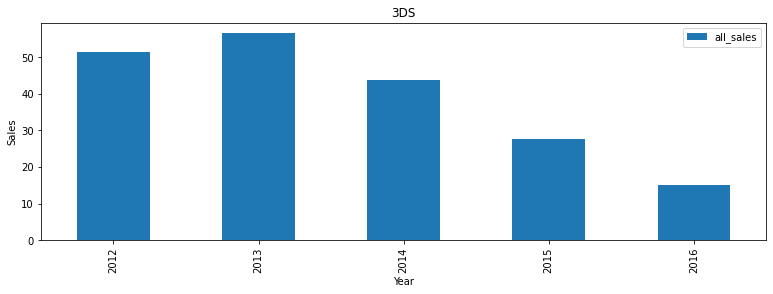

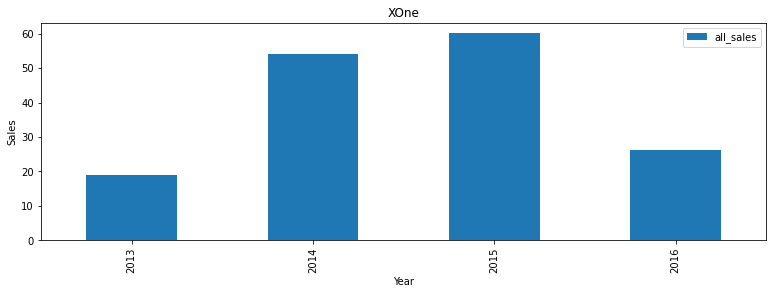

In [20]:
top_5 = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
for platform in top_5:
    df_query[df_query['platform'] == platform].pivot_table(index='year_of_release', values=['platform', 'all_sales'], aggfunc='sum').plot(kind='bar', figsize=(13, 4))
    plt.title(platform)
    plt.xlabel('Year')
    plt.ylabel('Sales')

### Summary

The first 5 platforms from the current period were selected for analysis, since the remaining platforms differ greatly in terms of indicators. After charting, it is observed that the X360, 3DS and PS3 platforms are in a state of decline. It can be assumed that sales will also be at a low level in 2016. There has been growth for the Xone and PS4 platforms since 2013. Since the data is incomplete in 2016, as it is clear from the assignment, it can be assumed that there will also be growth for these platforms and possibly a peak for these platforms. At the same time, sales of the PS4 in 2016 are around 70 million copies, and for the Xone about 25 million copies.

In [21]:
fig = px.box(df_query,
            x='platform',
            y='all_sales',
            title='Global sales by platform for the current period',
            labels={'platform' : 'Platforms',
                   'all_sales' : 'Sales'},
             range_y = (0,4),
             color='platform',
             boxmode='overlay'
            )
fig.update_xaxes(categoryorder='median descending')
fig.show()

### Summary

According to the "box with a mustache" chart, the largest-selling X360, PS4 and PS3 platforms show that the main sales are associated with so-called "outliers", despite the median approximately like other platforms. This may be due to some exclusives released only on these platforms, or to some sales hits. This adversely affects the platform as a whole, as not all games are well-marketed.

In [22]:
filter_list_top1 = (df_query['platform'] == "PS4") & (df_query['user_score'] >= 0) & (df_query['critic_score'] >= 0)
filter_list_other = (df_query['platform'] != "PS4") & (df_query['user_score'] >= 0) & (df_query['critic_score'] >= 0)

df_for_ratings_top1 = df_query[filter_list_top1]
df_for_ratings_other = df_query[filter_list_other]

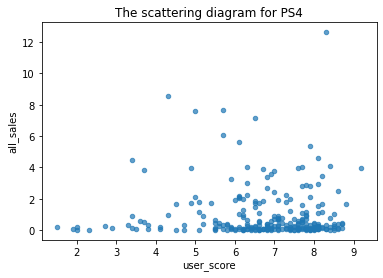

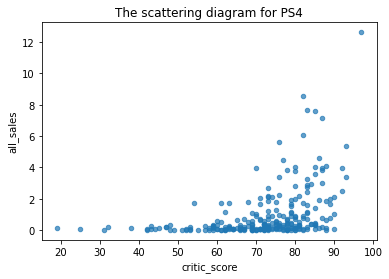

In [23]:
lead_platform = ['PS4']
other_top6_platform =  ('PS3', 'X360', 'Wii', 'XOne', 'WiiU')
score_types = ('user_score', 'critic_score')
 
for platform_name in lead_platform:
    for score_type in score_types:
        (df_for_ratings_top1[df_for_ratings_top1['platform'] == platform_name]
         .plot(x=score_type, 
               y='all_sales', 
               kind='scatter', 
               title='The scattering diagram for {}'.format(platform_name), 
               alpha = 0.7))
        plt.show()

### Summary

According to the scatter chart between user ratings and sales for the leading platform - PS4, it is observed that there is no strong dependence. It can be noted that games with a rating from 6.0 sometimes have increased sales. According to the PS4 scatter chart, there is some correlation between critics' ratings and sales, but not a strong one. Estimates from 70 have games with increased sales.

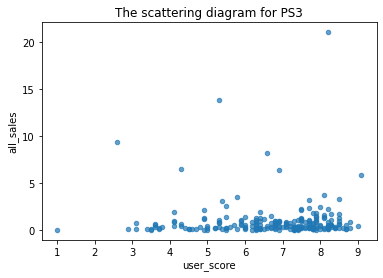

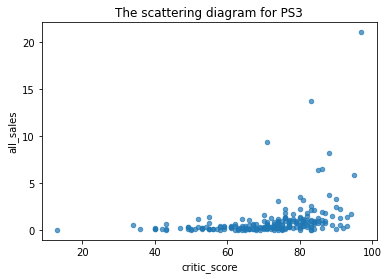

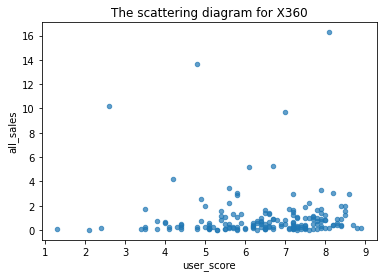

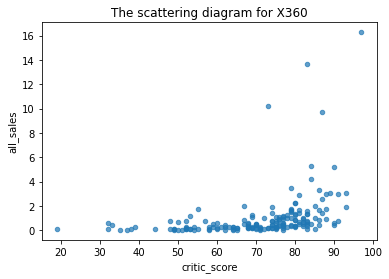

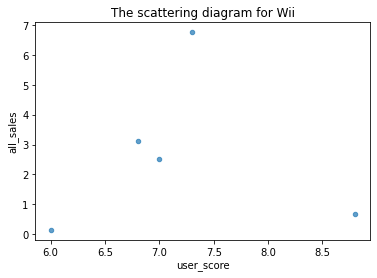

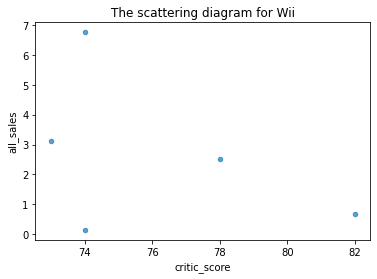

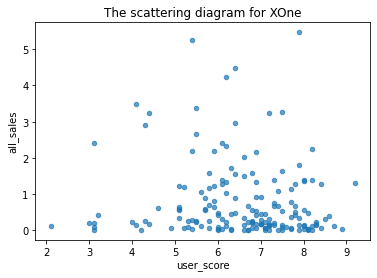

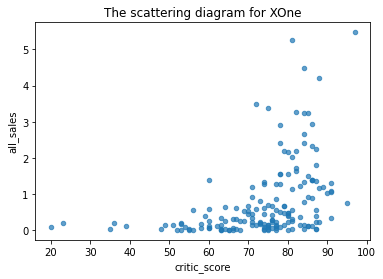

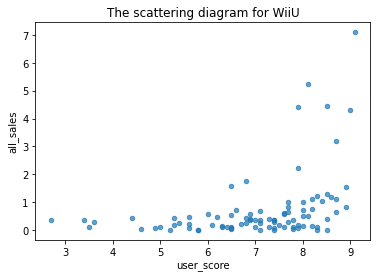

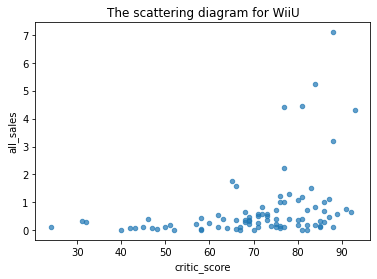

In [24]:
for platform_name in other_top6_platform:
    for score_type in score_types:
        (df_for_ratings_other[df_for_ratings_other['platform'] == platform_name]
         .plot(x=score_type, 
               y='all_sales', 
               kind='scatter', 
               title='The scattering diagram for {}'.format(platform_name), 
               alpha=0.7))
        plt.show()

The correlation coefficient between user_score and all_sales for the most popular platform for the current period is -0.03
The correlation coefficient between user_score and all_sales for the rest of the Top 6 platforms in popularity for the current period is equal to 0.01
The correlation coefficient between critic_score and all_sales for the most popular platform for the current period is 0.41
The correlation coefficient between critic_score and all_sales for the rest of the Top 6 platforms in popularity for the current period is equal to 0.28


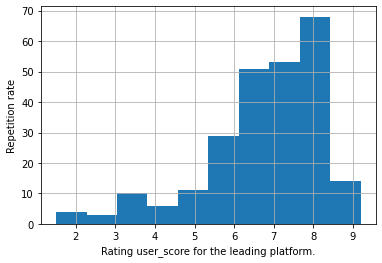

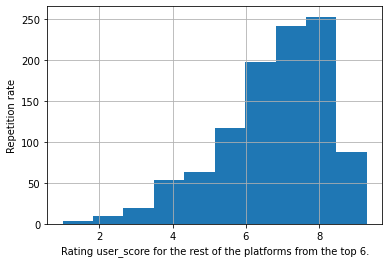

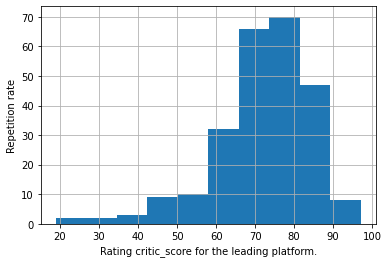

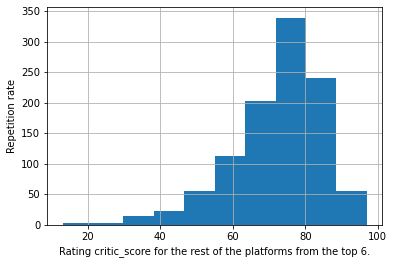

In [25]:
for score_type in score_types:
    print('The correlation coefficient between {} and {} for the most popular platform for the current period is {:.2f}'.format(score_type, 'all_sales', df_for_ratings_top1[score_type].corr(df_for_ratings_top1['all_sales'])))
    print('The correlation coefficient between {} and {} for the rest of the Top 6 platforms in popularity for the current period is equal to {:.2f}'.format(score_type, 'all_sales', df_for_ratings_other[score_type].corr(df_for_ratings_other['all_sales'])))
    
for score_type in score_types:
    df_for_ratings_top1[score_type].hist()
    plt.xlabel('Rating {} for the leading platform.'.format(score_type))
    plt.ylabel('Repetition rate')
    plt.show()
    df_for_ratings_other[score_type].hist()
    plt.xlabel('Rating {} for the rest of the platforms from the top 6.'.format(score_type))
    plt.ylabel('Repetition rate')
    plt.show()

### Summary

According to the calculations of the correlation coefficient and scattering diagrams for the Leading Platform and for the rest of the top 6 platforms, there is a weak negative and weak positive relationship between user_score and all_sales, respectively, but both values are near 0. At the same time, there is an average positive relationship between critic_score and all_sales for both the leading platform and the rest of the top 6 platforms. These calculations can be trusted, as professional critics evaluate each individual game critically according to their independent indicators. Most often, for a leading platform, an 8.0 score is found among user ratings - about 70 values. While other platforms also have a score of 8, but scores from 6 to 8 are more common. Among the critics' ratings for the leading platform, a score of 80 is most common, but a score of about 75 is also common. While for the rest of the platforms, critics gave ratings of about 80.

In [26]:
genre_all_sales = df_query.pivot_table(index='genre', values='all_sales', aggfunc='sum')
genre_all_sales.columns = ['sales_by_genre']
genre_all_sales.sort_values(by = 'sales_by_genre', ascending=False)

,sales_by_genre
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


<AxesSubplot:xlabel='genre'>

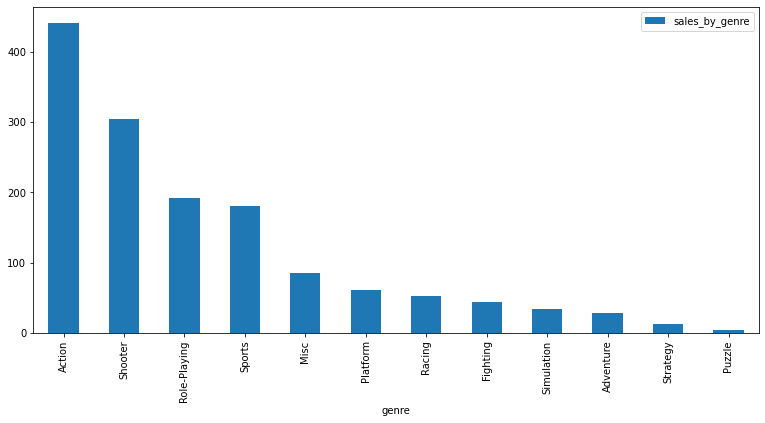

In [27]:
genre_all_sales.sort_values(by = 'sales_by_genre', ascending=False).plot(kind='bar', figsize=(13, 6))

### Summary

During the current period, the "Action" genre is the leader among sales. The most popular genre among gamers in general among all regions. It is also worth noting the standout genres of "Shooter", "Role-Playing" and "Sports". All these genres stand out from all the others and are in the period of over 180 million copies.

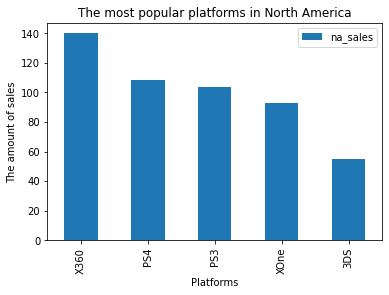

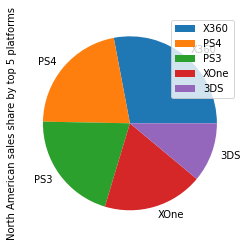

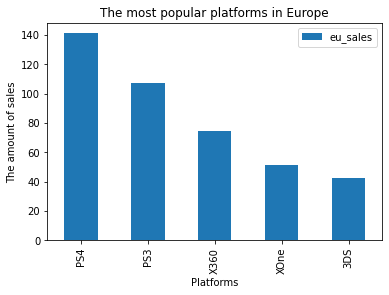

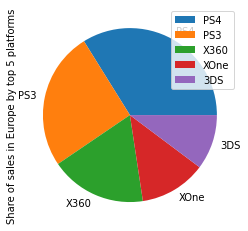

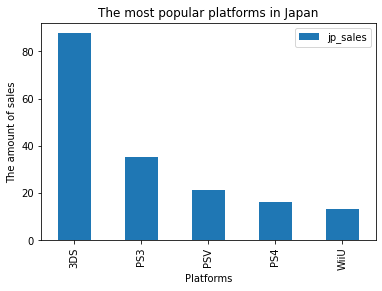

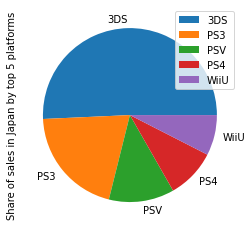

In [28]:
# Definition for users of each region (NA, EU, JP): the most popular platforms, genres and games in the context of the ESRB rating.
na_sales_platform = df_query.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_sales_platform.plot(kind='bar')
plt.xlabel('Platforms')
plt.ylabel('The amount of sales')
plt.title('The most popular platforms in North America')
plt.show()
na_sales_platform.plot(kind='pie', subplots=True)
plt.ylabel('North American sales share by top 5 platforms')
plt.show()
 
eu_sales_platform = df_query.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_sales_platform.plot(kind='bar')
plt.xlabel('Platforms')
plt.ylabel('The amount of sales')
plt.title('The most popular platforms in Europe')
plt.show()
eu_sales_platform.plot(kind='pie', subplots=True)
plt.ylabel('Share of sales in Europe by top 5 platforms')
plt.show()
 
jp_sales_platform = df_query.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_sales_platform.plot(kind='bar')
plt.xlabel('Platforms')
plt.ylabel('The amount of sales')
plt.title('The most popular platforms in Japan')
plt.show()
jp_sales_platform.plot(kind='pie', subplots=True)
plt.ylabel('Share of sales in Japan by top 5 platforms')
plt.show()

It can be concluded from the graphs and pie charts that sales by platform in Europe and North America have a similar structure (PS4, X360, PS3, Xone, 3DS), while sales by platform in Japan are very different and are extremely specific. The two WiiU and 3DS platforms are among the top 5 in sales in Japan, with 3DS taking a share of more than 50%.

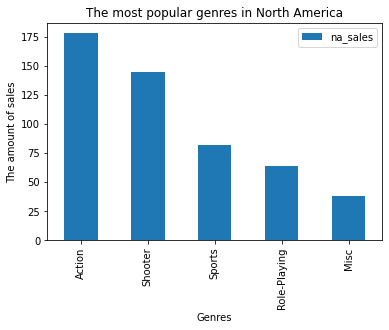

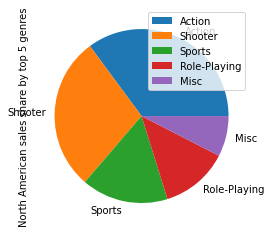

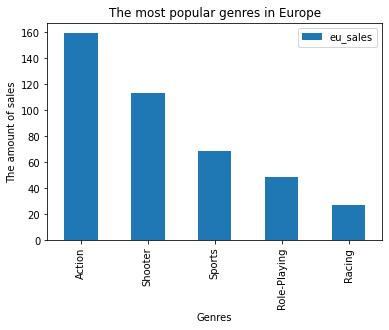

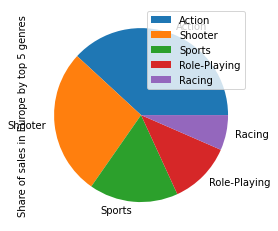

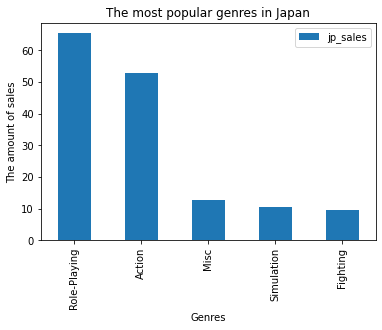

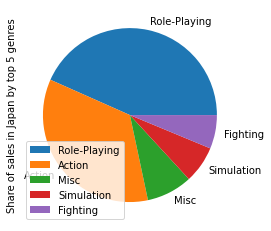

In [29]:
# top 5 popular genres
na_sales_genre = df_query.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_sales_genre.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('The amount of sales')
plt.title('The most popular genres in North America')
plt.show()
na_sales_genre.plot(kind='pie', subplots=True)
plt.ylabel('North American sales share by top 5 genres')
plt.show()
 
eu_sales_genre = df_query.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_sales_genre.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('The amount of sales')
plt.title('The most popular genres in Europe')
plt.show()
eu_sales_genre.plot(kind='pie', subplots=True)
plt.ylabel('Share of sales in Europe by top 5 genres')
plt.show()
 
jp_sales_genre = df_query.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_sales_genre.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('The amount of sales')
plt.title('The most popular genres in Japan')
plt.show()
jp_sales_genre.plot(kind='pie', subplots=True)
plt.ylabel('Share of sales in Japan by top 5 genres')
plt.show()

According to the graphs and pie charts, it can be concluded that sales by genre in Europe and North America have a similar structure (Action, Shooter, Sports, Role-Play, Misc), as well as for general sales, while sales by platform in Japan are very different and extremely specific. In Japan, the most popular genre is Role-Play, and the Simulation and Fighting genres are also worth noting.

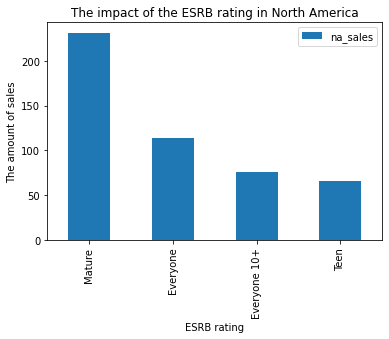

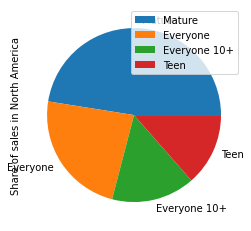

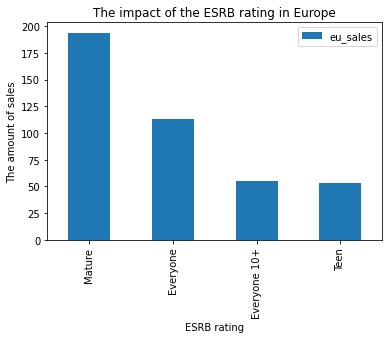

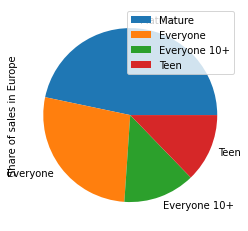

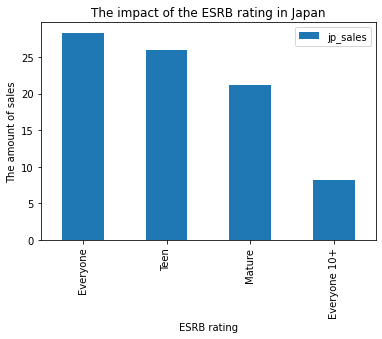

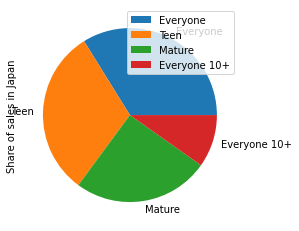

In [30]:
pd.options.mode.chained_assignment = None
#определим, влияет ли рейтинг ESRB на продажи в отдельном регионе
ESRB = {'E': 'Everyone', 'M': 'Mature', 'T': 'Teen', 'E10+': 'Everyone 10+', 'EC': 'Early Childhood'}
df_query['ESRB_description'] = df_query[df_query['rating'].notnull()]['rating'].map(ESRB)

na_sales_ESRB = df_query.groupby(by='ESRB_description').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_sales_ESRB.plot(kind='bar')
plt.xlabel('ESRB rating')
plt.ylabel('The amount of sales')
plt.title('The impact of the ESRB rating in North America')
plt.show()
na_sales_ESRB.plot(kind='pie', subplots=True)
plt.ylabel('Share of sales in North America')
plt.show()

 
eu_sales_ESRB = df_query.groupby(by='ESRB_description').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_sales_ESRB.plot(kind='bar')
plt.xlabel('ESRB rating')
plt.ylabel('The amount of sales')
plt.title('The impact of the ESRB rating in Europe')
plt.show()
eu_sales_ESRB.plot(kind='pie', subplots=True)
plt.ylabel('Share of sales in Europe')
plt.show()

 
jp_sales_ESRB = df_query.groupby(by='ESRB_description').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_sales_ESRB.plot(kind='bar')
plt.xlabel('ESRB rating')
plt.ylabel('The amount of sales')
plt.title('The impact of the ESRB rating in Japan')
plt.show()
jp_sales_ESRB.plot(kind='pie', subplots=True)
plt.ylabel('Share of sales in Japan')
plt.show()


According to the graphs and pie charts, it can be concluded that sales by ratings in Europe and North America have a similar structure and sales with a Mature rating are leading, which indicates that the buyers are adults 18+ (about 50%), while sales by platforms in Japan are very different and extremely specific. In Japan, Everyone and Teen rated games are most often bought.

### Summary

Let's make a general conclusion that Japan has an extremely specific market for selling games, as evidenced by an analysis by genre, ratings and platforms.

In [31]:
# The average user ratings of the Xbox One and PC platforms are the same
xbox_one = df_query[(df_query['platform'] == "XOne") & (df_query['user_score'] >= 0)]['user_score']
pc = df_query[(df_query['platform'] == "PC") & (df_query['user_score'] >= 0)]['user_score']

H0: The average user ratings of the Xbox One and PC platforms are the same; </br>
H1: The average user ratings of the Xbox One and PC platforms are different;

To compare two variances of independent samples, we use the Levene Test.
To test statistical hypotheses, we will use the Student's Test.

In [32]:
# Leven's Test
W1, pval1 = st.levene(xbox_one, pc, center='median')
print(W1)
print(pval1)

6.295287176069245
0.01251484281850554


Accordingly, the variances are equal, so we use equal_var=True

In [33]:
# Student's Test

alpha = 0.05  # critical level of statistical significance
# if the p-value turns out to be less than it, we reject the hypothesis

results = st.ttest_ind(xbox_one, pc, equal_var=True)

print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print('We cannot reject the null hypothesis')

p-value: 0.5535080500643661
We cannot reject the null hypothesis


In [34]:
# Average user ratings of the Action and Sports genres are different
action = df_query[(df_query['genre'] == "Action") & (df_query['user_score'] >= 0)]['user_score']
sports = df_query[(df_query['genre'] == "Sports") & (df_query['user_score'] >= 0)]['user_score']

H0: Average user ratings of the genres Action (English "action", action games) and Sports (English "sports competitions") similar. </br>
H1: Average user ratings of the genres Action (English "action", action games) and Sports (English "sports competitions") are different.

To compare two variances of independent samples, we use the Levene Test.
To test statistical hypotheses, we will use the Student's Test.

In [35]:
# Leven's Test
W1, pval1 = st.levene(action, sports, center='median')
print(W1)
print(pval1)

19.259864452764166
1.3125789036876737e-05


Accordingly, the variances are equal, so we use equal_var=True

In [36]:
# Student's Test

alpha = 0.05  # critical level of statistical significance
# if the p-value turns out to be less than it, we reject the hypothesis

results = st.ttest_ind(action, sports, equal_var=True)

print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print('We cannot reject the null hypothesis')

p-value: 3.7163089460934874e-26
We reject the null hypothesis


### Summary

Based on the results of the analysis, it turned out that we cannot reject the hypothesis that the average user ratings of the two samples for the Xone and PC platforms are equal. Accordingly, let's assume that the averages of the two samples are equal and 19% is determined by random variables.
According to the results of the analysis, it turned out that we reject the hypothesis of equality of the average two samples with two genres of Action and Sports according to the results of the Student's Test.

# Summary

According to the results of the analysis, it was found that the most promising platforms are PS4 and Xone in general, but at the same time, 3DS is a specific platform for Japan. It is also possible to predict that the most popular games will be games with the Action genre. 2017 will be characterized by the release of games with the Mature genre, i.e. games with an age limit of 18+. 
An advertising company should be based on these characteristics, this will allow you to bet on a potentially popular product. But it is important to note that since genres and platforms are specific to Japan, this should be taken into account when making a forecast.